# Topics:


```
1. Data load
2. Quantiles
3. Outlier detect using BoxPlot
4. IQR
5. Remove outlier
6. Covariance
7. Correlation
```



#Quantile


```
Detect the outlier
1. Quartile
2. Decile
3. Percentile
4. Inter Quantile Range (IQR)
```



#Data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')
bckup = data.copy()

In [3]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
data['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


# 1. Quantile

In [10]:
#Quantile of 25%
data['Age'].quantile(0.25)

20.125

In [9]:
# Quantile of 50%
data['Age'].quantile(0.5)

28.0

In [11]:
# Quantile of 75%
data['Age'].quantile(0.75)

38.0

# Custume data


```
List = 78, 82, 84, 88, 91, 93, 94, 96, 98, 99
```



In [13]:
new_data = pd.Series(
    [78, 82, 84, 88, 91, 93, 94, 96, 98, 99]
)

In [14]:
new_data.quantile(0.75)

95.5

# Outlier Detect

In [23]:
data['Age'].min()

0.42

In [24]:
data.loc[data['Age'] == data['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


# IQR = Q3-Q1

In [26]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3-Q1
IQR

17.875

In [28]:
min_val = Q1 - 1.5*IQR
max_val = Q3 + 1.5*IQR

min_val, max_val

(-6.6875, 64.8125)

In [35]:
data[data['Age'] > max_val]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


<Axes: ylabel='Age'>

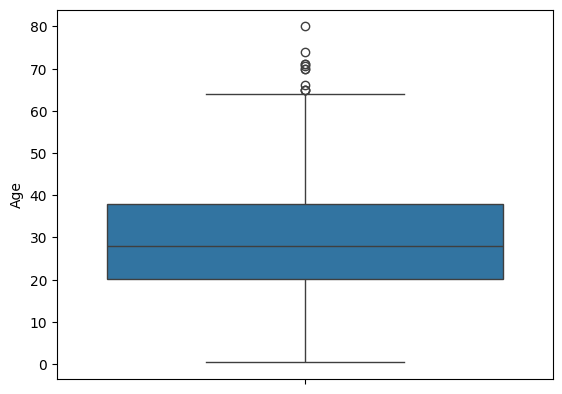

In [31]:
sns.boxplot(data['Age'])

# Remove Outlier

In [41]:
remove_outlier = data[(data['Age'] > min_val) & (data['Age'] < max_val)]

# Check Shape

In [44]:
data.shape, remove_outlier.shape

((891, 12), (703, 12))

<Axes: ylabel='Age'>

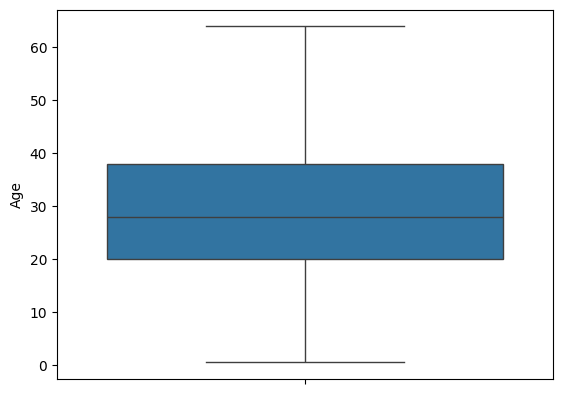

In [42]:
sns.boxplot(remove_outlier['Age'])

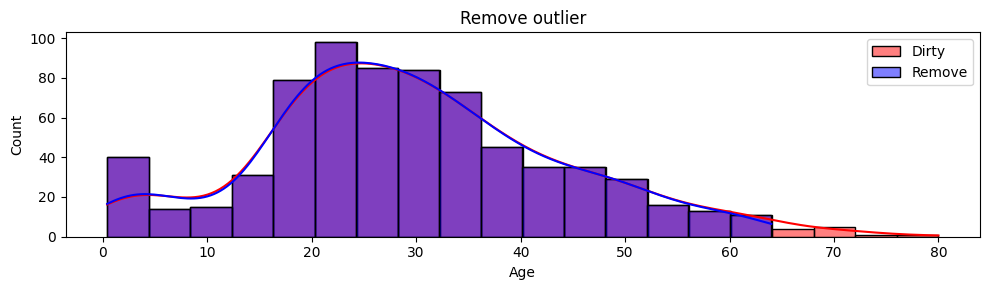

In [76]:
plt.figure(figsize=(10,3))

sns.histplot(data['Age'], kde=True, color='red', label='Dirty')
sns.histplot(remove_outlier['Age'], color='blue', kde=True, label='Remove')

plt.title(f"Remove outlier")
plt.legend()

plt.tight_layout()
plt.show()

# Covariance and Correlation

<Axes: xlabel='Age', ylabel='Fare'>

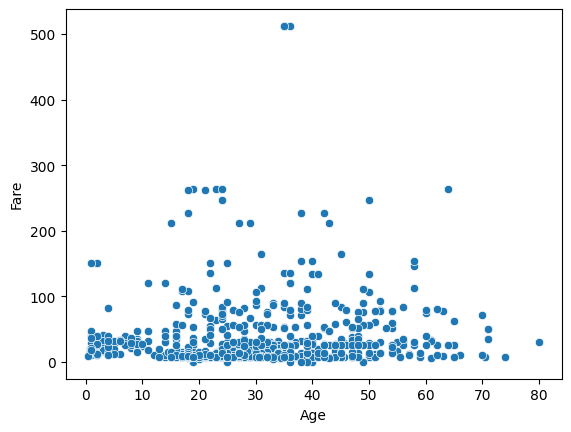

In [97]:
sns.scatterplot(data = data, x='Age', y='Fare')

# Covariance

In [100]:
data['Age'].cov(data['Fare'])

73.84902981461926

# Correlation

In [101]:
data['Age'].corr(data['Fare'])

0.0960666917690389